# **Regression vs Classification**
![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Regression_vs_Classification.jpg)

#**Regression:**
![image](https://i0.wp.com/www.machinelearningplus.com/wp-content/uploads/2017/09/linear_vs_logistic_regression.jpg?ssl=1)


#**Linear Regression**

![image](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/39_blog_image_1.png)

- b0 is the y intercept

- b1 till bn is the slope / coefficient

#**Assumptions on Independent variables (X):**

**Linearity:**

There is a linear relationship between independent and dependent variable. (There is a correlation between X and y)

**No Multicollinearity:**

There is no correaltion betweeen the predictors / independent variables (X) among themselves.

#**Assumptions on Residuals:**

**Independence:**  Residuals are independent of each other, there is no auto correlation

**Homoscedasticity:** There is constant variance between the residuals

**Normality:** Residuals are normally distributed

#Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, pearsonr, spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge, Lasso

import warnings
warnings.filterwarnings('ignore')

#Load boston hosuing price dataset from sklearn


In [2]:
from sklearn import datasets

In [3]:
dataset = datasets.fetch_california_housing()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

#Description of Dataset

In [5]:
print(dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

#Preparing Dataset

In [6]:
data = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])

In [7]:
data['target'] = pd.Series(dataset['target'])

#The Dataset

In [8]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#Information of Dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#Check missing values

In [11]:
data.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [12]:
data.isnull().all(axis=1).sum()

0

In [13]:
data.isnull().all(axis=0).sum()

0

#Checking correlation between independent and dependent variables
 Assumption on independent variables


 Linearity: There is a linear relationship between independent and dependent variable.


 By default data.corr() uses pearsonr correlation which assumes data is normally distributed

In [14]:
data.corr()['target']

,target
MedInc,0.688075
HouseAge,0.105623
AveRooms,0.151948
AveBedrms,-0.046701
Population,-0.024650
AveOccup,-0.023737
Latitude,-0.144160
Longitude,-0.045967
target,1.000000


To test if data is normally dsitributed we can conduct a statistical test called **Kolmogorov-Smirnov test**

The Kolmogorov-Smirnov test compares the sample distribution with a reference probability distribution (in this case, the normal distribution).

It tests the null hypothesis that the data was drawn from a normally distributed population

**null(h0): There is no correlation between dependent and independent variables**

**alternative(h1): There is a correlation between dependent and independent**

**if pvalue is less than 0.05 then reject H0 and accept H1**

In [15]:
for col in data.columns:
  stat, p = kstest(data[col], 'norm')
  print('col', col, 'stat', stat, 'p', p)

  if p < 0.05:
    print(f'Reject H0: Accept H1. {col} is not normally distributed')
  else:
    print('Fail to reject H0. Reject H1. {col} is normally distributed')

col MedInc stat 0.8953266796146241 p 0.0
Reject H0: Accept H1. MedInc is not normally distributed
col HouseAge stat 0.9956462259993777 p 0.0
Reject H0: Accept H1. HouseAge is not normally distributed
col AveRooms stat 0.9860013969530746 p 0.0
Reject H0: Accept H1. AveRooms is not normally distributed
col AveBedrms stat 0.7991145066476436 p 0.0
Reject H0: Accept H1. AveBedrms is not normally distributed
col Population stat 0.9999512637360249 p 0.0
Reject H0: Accept H1. Population is not normally distributed
col AveOccup stat 0.9317322782195766 p 0.0
Reject H0: Accept H1. AveOccup is not normally distributed
col Latitude stat 1.0 p 0.0
Reject H0: Accept H1. Latitude is not normally distributed
col Longitude stat 1.0 p 0.0
Reject H0: Accept H1. Longitude is not normally distributed
col target stat 0.6971097919468275 p 0.0
Reject H0: Accept H1. target is not normally distributed


**Pearsonr:**

**Pearson correlation coefficient** and is commonly used in statistics to measure the linear relationship between dependent and independent variables.

In [16]:
for col in data.columns:
  test_stat, pvalue = pearsonr(data[col], data['target'])
  print('col', col, 'pvalue', pvalue)

  if pvalue < 0.05:
      print(f'There is a correlation between {col} and target')
  else:
      print(f'There is no correlation between {col} and target')

col MedInc pvalue 0.0
There is a correlation between MedInc and target
col HouseAge pvalue 2.7618606761039285e-52
There is a correlation between HouseAge and target
col AveRooms pvalue 7.569242134484702e-107
There is a correlation between AveRooms and target
col AveBedrms pvalue 1.9125893871714508e-11
There is a correlation between AveBedrms and target
col Population pvalue 0.00039763078478337045
There is a correlation between Population and target
col AveOccup pvalue 0.0006483442369925424
There is a correlation between AveOccup and target
col Latitude pvalue 2.9398592906903436e-96
There is a correlation between Latitude and target
col Longitude pvalue 3.9233220710332434e-11
There is a correlation between Longitude and target
col target pvalue 0.0
There is a correlation between target and target


**Spearman's Rank Correlation Coefficient:**

Spearman's correlation is a non-parametric measure of rank correlation.
It is suitable for ordinal data or continuous data that do not meet the assumptions of normality.

In [17]:
## but as data is not normally distributed we can test correlation using spearman rank

for col in data.columns:

  test_stat, pvalue = spearmanr(data[col], data['target'])
  print('col', col, 'pvalue', pvalue)

  if pvalue < 0.05:
      print(f'There is a correlation between {col} and target')
  else:
      print(f'There is no correlation between {col} and target')

col MedInc pvalue 0.0
There is a correlation between MedInc and target
col HouseAge pvalue 4.8443294949346314e-27
There is a correlation between HouseAge and target
col AveRooms pvalue 0.0
There is a correlation between AveRooms and target
col AveBedrms pvalue 7.188442005861117e-73
There is a correlation between AveBedrms and target
col Population pvalue 0.5813126917160487
There is no correlation between Population and target
col AveOccup pvalue 1.289394324369403e-307
There is a correlation between AveOccup and target
col Latitude pvalue 4.994632332612018e-127
There is a correlation between Latitude and target
col Longitude pvalue 1.2410018250955549e-23
There is a correlation between Longitude and target
col target pvalue 0.0
There is a correlation between target and target


**As per Correlaton test, we conclude that all features have correlation with target which confirms there is a linear relationship and meets the assumption of Linearity.**
**If any feature doesn't meet this assumption, we need to remove that feature.**

In [18]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [19]:
correlation_matrix = data.corr()

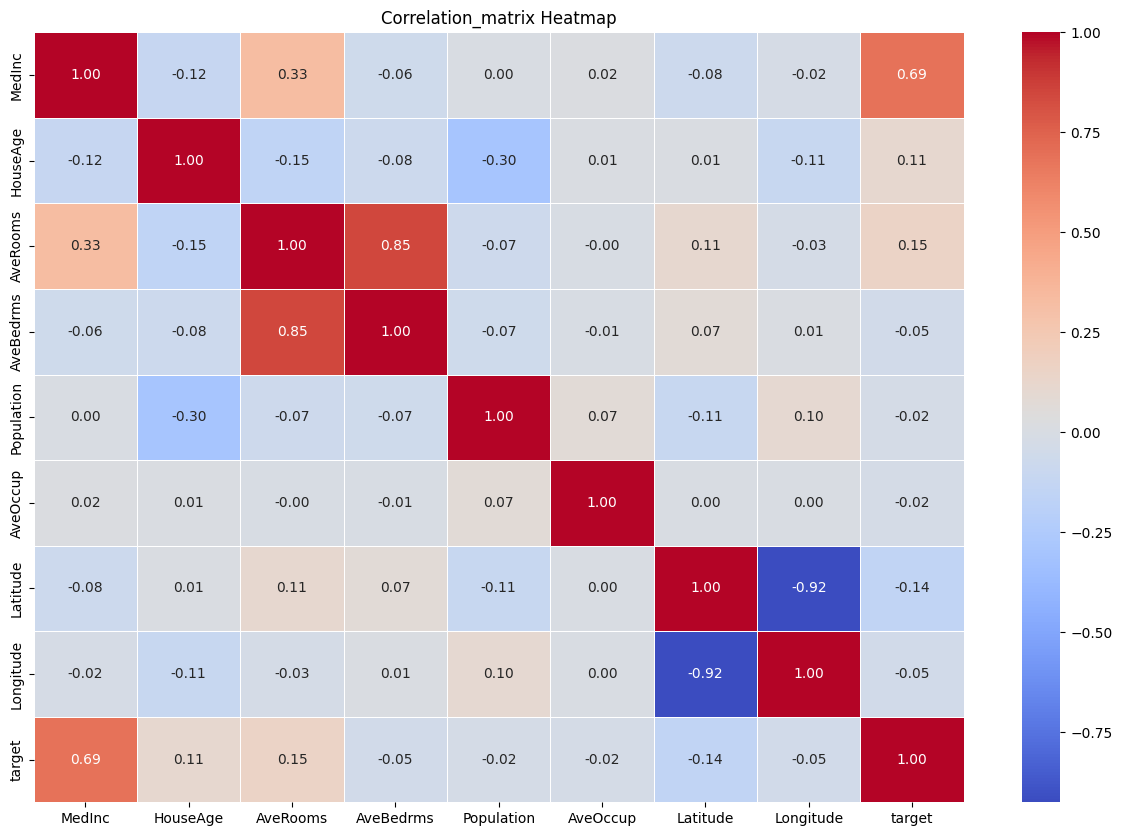

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation_matrix Heatmap')
plt.show()

#Use VIF to identify multicollinearity

VIF:

Range (1 - infinity)

VIF = 1: No correlation between the column and other predictor columns

1 < VIF < 5 : Moderate correlation, not severe. Acceptable.

 VIF between 5 and 10 : High correlation. Acceptable but can be experimented with multiple models by removing them.

VIF > 10: Very high correlation among other predictor columns: You will have to remove one of the paired columns with high collinearity and check VIF once again till all columns have acceptable VIF scores. Paired columns are columns which have similar VIF score. If there are no paired columns and only a single column has very high VIF then you can remove it directly.


In [21]:
vif_data = pd.DataFrame()
vif_data

""


In [22]:
vif_data['feature'] = data.drop(columns='target').columns
vif_data

,feature
0,MedInc
1,HouseAge
2,AveRooms
3,AveBedrms
4,Population
5,AveOccup
6,Latitude
7,Longitude


In [23]:
data.drop(columns='target').shape

(20640, 8)

In [24]:
vif_data['VIF'] = [variance_inflation_factor(data.drop(columns='target').values, i) for i in range (data.drop(columns='target').shape[1])]

vif_data

,feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [25]:
data.corr()['target']

,target
MedInc,0.688075
HouseAge,0.105623
AveRooms,0.151948
AveBedrms,-0.046701
Population,-0.024650
AveOccup,-0.023737
Latitude,-0.144160
Longitude,-0.045967
target,1.000000


In [26]:
cols_to_drop = ['AveBedrms', 'Longitude']

data.drop(columns=cols_to_drop, inplace=True)

In [27]:
vif_data = pd.DataFrame()

vif_data['feature'] = data.drop(columns='target').columns
vif_data

vif_data['VIF'] = [variance_inflation_factor(data.drop(columns='target').values, i) for i in range(data.drop(columns='target').shape[1])]

vif_data

,feature,VIF
0,MedInc,5.640759
1,HouseAge,6.766700
2,AveRooms,6.821976
3,Population,2.773339
4,AveOccup,1.094801
5,Latitude,19.302219


In [28]:
cols_to_drop = ['Latitude']

data.drop(columns=cols_to_drop, inplace=True)

In [29]:
vif_data = pd.DataFrame()

vif_data['feature'] = data.drop(columns='target').columns
vif_data

vif_data['VIF'] = [variance_inflation_factor(data.drop(columns='target').values, i) for i in range(data.drop(columns='target').shape[1])]

vif_data

,feature,VIF
0,MedInc,5.111195
1,HouseAge,3.276300
2,AveRooms,5.137411
3,Population,2.136316
4,AveOccup,1.094552


In [30]:
# Feature selection has been done based on Linearity and Multicollinearity
# These final features to build our model and then test our assumpitions on resdiuals to validate if are our model is reliable or not

#The Final Dataset

In [31]:
data.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,target
0,8.3252,41.0,6.984127,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,3.422


#The Shape of Dataset

In [32]:
print('The number of rows: ', data.shape[0])
print('The number of columns: ', data.shape[1])

The number of rows:  20640
The number of columns:  6


In [33]:
correlation_matrix = data.corr()

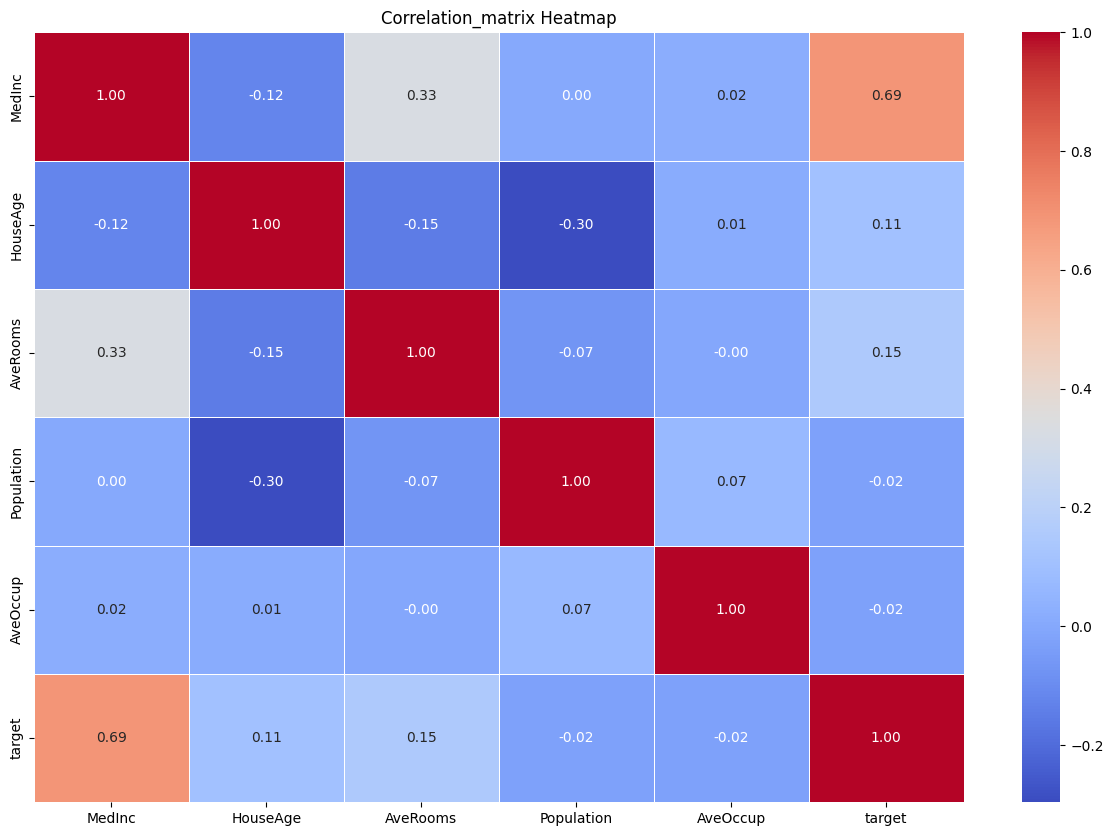

In [34]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation_matrix Heatmap')
plt.show()

#Splitting Dataset into Train and Test

In [35]:
X = data.drop(columns='target')
y = data['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [37]:
# The `random_state` parameter in machine learning models ensures reproducibility by controlling the randomness involved in processes like data splitting or model initialization.
# Setting a fixed value for `random_state` allows you to get the same results every time you run the code , with that random_state number.
# random_state is like indexing or fixing that code with that number
# eg. random_state = 100

In [38]:
X_train.shape

(16512, 5)

In [39]:
X_test.shape

(4128, 5)

# Feature Scaling


In [40]:
# Standard Scaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)


#Create model with Linear Regression

In [41]:
linear_reg_model = LinearRegression()

In [42]:
linear_reg_model.fit(scaled_X_train, y_train)

LinearRegression()

In [43]:
# Predictions on traning data

pred_train = linear_reg_model.predict(scaled_X_train)

In [44]:
# Predictions

pred_train

array([1.47787968, 1.50256608, 1.66102031, ..., 2.52704557, 1.48796882,
       2.74312318])

In [45]:
# Actual target values

y_train

,target
3278,1.083
16630,1.832
18748,1.184
14961,2.494
1740,1.207
...,...
16304,2.420
79,1.313
12119,1.977
14147,1.351


In [46]:
# Residuals
# Difference between actual and predicted values

residuals = y_train - pred_train

In [47]:
residuals

,target
3278,-0.394880
16630,0.329434
18748,-0.477020
14961,0.233045
1740,-0.057780
...,...
16304,-2.051467
79,-0.104472
12119,-0.550046
14147,-0.136969


Assumptions on Residuals:

1. Independence: Residuals are independent of each other, there is no auto correlation

2. Homoscedasticity: There is constant variance between the residuals

3. Normality: Residuals are normally distributed

In [48]:
# Independence: Durbin-Watson Test
# Value should be between 1.5 and 2.5 for independent residuals

dw = durbin_watson(residuals)
print(f'Durbin-Watson: {dw:.3f}')

Durbin-Watson: 2.012


In [49]:
# Independence assumption is met

In [50]:
# Homoscedasticity: Breusch-Pagan Test

# Null hypothesis: Homoscedasticity : there is constant variance
# Alternaive : heteroscedasticity: varinace is not constant

scaled_X_train_with_const = sm.add_constant(scaled_X_train)
_, pval, _, _ = het_breuschpagan(residuals, scaled_X_train_with_const)
print(f'Breusch-Pagan p-value: {pval:.3f}')

Breusch-Pagan p-value: 0.000


In [51]:
if pval < 0.05:
  print('Reject H0: Accept H1. There is heteroscedasticity')
else:
  print('Fail to reject H0. Reject H1. There is homoscedasticity')



Reject H0: Accept H1. There is heteroscedasticity


In [52]:
# Assumption of Homoscedasticity is not met

In [53]:
# Normality: Kolmogorov-Smirnov Test
# Null hypothesis: Data is normally distributed
# Alternative: Data is not normally distributed

ks_test = kstest(residuals, 'norm')

print(f'Kolmogorov-Smirnov p-value: {ks_test.pvalue:.3f}')


Kolmogorov-Smirnov p-value: 0.000


In [54]:
# Normality Assumption failed

# Score check

In [55]:
r2_score(y_train, pred_train)

0.5088546175270785

In [56]:
pred_test = linear_reg_model.predict(scaled_X_test)

In [57]:
r2_score(y_test, pred_test)

0.5359831733503055

In [58]:
residuals_test = y_test - pred_test
residuals_test

,target
8151,0.369314
53,-0.310570
3039,-0.745085
9484,0.130432
9307,1.491699
...,...
16733,0.246724
5264,-0.081145
12374,0.988694
19662,-0.678212


In [59]:
# As the training and testing score are both very low it means the model is underfitting
# Also some of the assumptions are not met which means we can't rely on Linear Regression for this data.

#Checking Errors


![image](https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG)


In [60]:
# Error or Loss of Function
# MAE: Mean Absolute error
# MSE: Mean Squared error
# RMSE: root mean square error

In [61]:
# MAE: Mean Absolute error of train data

mean_absolute_error(y_train, pred_train)

0.6015440534899017

In [62]:
# MAE: Mean Absolute error of test data

mean_absolute_error(y_test, pred_test)

0.5910313900557871

In [63]:
# MSE: Mean Squared error of train data

mean_squared_error(y_train, pred_train)

0.6520169016077667

In [64]:
# MSE: Mean Squared error of test data

mean_squared_error(y_test, pred_test)

0.6252149990439667

In [65]:
# RMSE: Root Mean Square error of Train data

np.sqrt((residuals**2).mean())

0.8074756353028658

In [66]:
# RMSE: Root Mean Square error of Test data

np.sqrt((residuals_test**2).mean())

0.7907053806848456

#Feature Importance

In [67]:
# Coefficient of Linear regression model

linear_reg_model.coef_

array([ 0.83602987,  0.22073148, -0.06138963,  0.03000376, -0.04894228])

In [68]:
# Feature importance specific to Linear Regression

feature_importance = np.abs(linear_reg_model.coef_)

feature_importance_normalized = feature_importance / np.sum(feature_importance)

print(feature_importance_normalized)

[0.69838104 0.18438896 0.05128208 0.02506377 0.04088414]


In [69]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'target'], dtype='object')

In [70]:
data.drop(columns='target').columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup'], dtype='object')

In [71]:
Feature_imp = pd.Series(feature_importance_normalized, index=data.drop(columns='target').columns)

In [72]:
Feature_imp

,0
MedInc,0.698381
HouseAge,0.184389
AveRooms,0.051282
Population,0.025064
AveOccup,0.040884


#Permutation Importance

In [73]:
# Permutation_importance is model-agnostic which means it can be used on any algorithm

permutation_imp = permutation_importance(linear_reg_model, scaled_X_train, y_train, n_repeats=10, random_state=0)

In [74]:
permutation_imp.importances

array([[1.06561415e+00, 1.03300481e+00, 1.04018550e+00, 1.04748664e+00,
        1.06656629e+00, 1.05804092e+00, 1.06149186e+00, 1.04644083e+00,
        1.06690193e+00, 1.05064602e+00],
       [7.43933739e-02, 7.33194805e-02, 7.29730086e-02, 7.48643109e-02,
        7.08468203e-02, 7.38454462e-02, 7.25607601e-02, 6.95128959e-02,
        7.03117613e-02, 7.50836550e-02],
       [5.52484771e-03, 5.60509767e-03, 6.00589482e-03, 6.85134967e-03,
        5.26579427e-03, 5.97035176e-03, 5.42322845e-03, 5.90200404e-03,
        4.87477447e-03, 7.20615451e-03],
       [1.86537401e-03, 1.34988796e-03, 1.20939933e-03, 1.09367577e-03,
        1.90587185e-03, 7.61476464e-04, 1.58945460e-03, 1.15121890e-03,
        1.81729399e-03, 1.42515211e-03],
       [2.90015581e-03, 3.56171896e-03, 2.80181123e-03, 3.48824300e-03,
        3.25977298e-03, 3.70739269e-03, 3.65915563e-03, 3.89932385e-03,
        3.40648195e-03, 3.13229707e-03]])

In [75]:
permutation_imp.importances_mean

array([1.05363789, 0.07277115, 0.00586295, 0.00141688, 0.00338164])

In [76]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'target'], dtype='object')

In [77]:
Permutation_importances = pd.Series(feature_importance_normalized, index = data.drop(columns='target').columns)

In [78]:
Permutation_importances

,0
MedInc,0.698381
HouseAge,0.184389
AveRooms,0.051282
Population,0.025064
AveOccup,0.040884


#Implementing Ridge and Lasso

# Preparing model with Rigde

In [79]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Checking the scores of Ridge_model

In [80]:
r2_score(y_train, y_train_pred_ridge)

0.5088546173542825

In [81]:
r2_score(y_test, y_test_pred_ridge)

0.5359826637506054

#Coefficient of Ridge_model

In [82]:
ridge_model.coef_

array([ 4.40740373e-01,  1.74964836e-02, -2.45677847e-02,  2.62337522e-05,
       -4.26904508e-03])

In [102]:
Ridge_model_coefficient = pd.Series(ridge_model.coef_, index=data.drop(columns='target').columns)
Ridge_model_coefficient

,0
MedInc,0.440740
HouseAge,0.017496
AveRooms,-0.024568
Population,0.000026
AveOccup,-0.004269


#Errors of Ridge model

In [84]:
train_ridge_mean_absolute_error = mean_absolute_error(y_train, y_train_pred_ridge)
train_ridge_mean_absolute_error

0.6015453224257545

In [85]:
train_ridge_mean_squared_error = mean_squared_error(y_train, y_train_pred_ridge)
train_ridge_mean_squared_error

0.6520169018371609

In [99]:
test_ridge_mean_absolute_error = mean_absolute_error(y_test, y_test_pred_ridge)
test_ridge_mean_absolute_error

0.5910328262306755

In [100]:
test_ridge_mean_squared_error = mean_squared_error(y_test, y_test_pred_ridge)
test_ridge_mean_squared_error

0.6252156856772042

# Preparing model with Lasso

In [89]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Checking the score of Lasso model

In [90]:
r2_score(y_train, y_train_pred_lasso)

0.27845557171396595

In [91]:
r2_score(y_test, y_test_pred_lasso)

0.28706930399923203

#Coefficient of Lasso_model

In [92]:
lasso_model.coef_

array([ 1.42354296e-01,  5.59596012e-03,  0.00000000e+00, -8.01185615e-06,
       -0.00000000e+00])

In [103]:
Lasso_model_coefficient = pd.Series(lasso_model.coef_, index=data.drop(columns='target').columns)
Lasso_model_coefficient

,0
MedInc,0.142354
HouseAge,0.005596
AveRooms,0.000000
Population,-0.000008
AveOccup,-0.000000


# Errors of Lasso_model

In [93]:
train_lasso_mean_absolute_error = mean_absolute_error(y_train, y_train_pred_lasso)
train_lasso_mean_absolute_error

0.7719775058919018

In [94]:
train_lasso_mean_squared_error = mean_squared_error(y_train, y_train_pred_lasso)
train_lasso_mean_squared_error

0.9578816767748912

In [97]:
test_lasso_mean_absolute_error = mean_absolute_error(y_test, y_test_pred_lasso)
test_lasso_mean_absolute_error

0.7694227560779271

In [98]:
test_lasso_mean_squared_error = mean_squared_error(y_test, y_test_pred_lasso)
test_lasso_mean_squared_error

0.9606008636299701